In [31]:
from pathlib import Path
from typing import List, Optional
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging

from webanno_tsv import webanno_tsv_read_file, Document, Annotation, Token

train_data_dir = Path("../data/train")
test_data_dir = Path("../data/test_labeled")
val_data_dir = Path("../data/val")


In [39]:
def get_annotations(files):
    annotations = []
    for file_path in files:
        doc = webanno_tsv_read_file(file_path)
        annotations.extend([x for x in doc.annotations])

    print(f'{len(annotations)} annotations found in {len(files)} files.')    
    counter = defaultdict(int)
    for annotation in annotations:
        counter[annotation.label] += 1

    label_to_uniq_span = defaultdict(set)

    for annotation in annotations:
        label_to_uniq_span[annotation.label].add(annotation.text)
    
    # for label, uniq_spans in label_to_uniq_span.items():
    #     print(f'{label}:\t{len(uniq_spans)}')

    for label in sorted(counter.keys()):
        print(f'{label}:\t{counter[label]}')
    print('======================')
    for label in sorted(label_to_uniq_span.keys()):
        print(f'{label}:\t{len(label_to_uniq_span[label])}')

# print(counter)
# train_df = pd.DataFrame(counter.items(), columns=['label', 'count']).sort_values(by='count', ascending=False)
# print(train_df)




In [40]:
files = [x for x in train_data_dir.rglob("*.tsv")]

get_annotations(files)


9125 annotations found in 183 files.
CONFERENCE:	616
DATASET:	1397
EVALMETRIC:	558
LICENSE:	127
ONTOLOGY:	86
PROGLANG:	565
PROJECT:	707
PUBLICATION:	1121
SOFTWARE:	3874
WORKSHOP:	74
CONFERENCE:	374
DATASET:	599
EVALMETRIC:	220
LICENSE:	56
ONTOLOGY:	31
PROGLANG:	65
PROJECT:	133
PUBLICATION:	921
SOFTWARE:	1260
WORKSHOP:	45


In [43]:
files = [x for x in val_data_dir.rglob("*.tsv")]

get_annotations(files)


1541 annotations found in 33 files.
CONFERENCE:	365
DATASET:	159
EVALMETRIC:	58
LICENSE:	15
ONTOLOGY:	27
PROGLANG:	56
PROJECT:	77
PUBLICATION:	373
SOFTWARE:	404
WORKSHOP:	7
CONFERENCE:	116
DATASET:	56
EVALMETRIC:	35
LICENSE:	7
ONTOLOGY:	6
PROGLANG:	14
PROJECT:	19
PUBLICATION:	354
SOFTWARE:	130
WORKSHOP:	7


In [42]:
files = [x for x in test_data_dir.rglob("*.tsv")]

get_annotations(files)


1995 annotations found in 40 files.
CONFERENCE:	195
DATASET:	263
EVALMETRIC:	143
LICENSE:	26
ONTOLOGY:	8
PROGLANG:	109
PROJECT:	28
PUBLICATION:	362
SOFTWARE:	824
WORKSHOP:	37
CONFERENCE:	137
DATASET:	122
EVALMETRIC:	72
LICENSE:	14
ONTOLOGY:	1
PROGLANG:	20
PROJECT:	23
PUBLICATION:	318
SOFTWARE:	275
WORKSHOP:	15


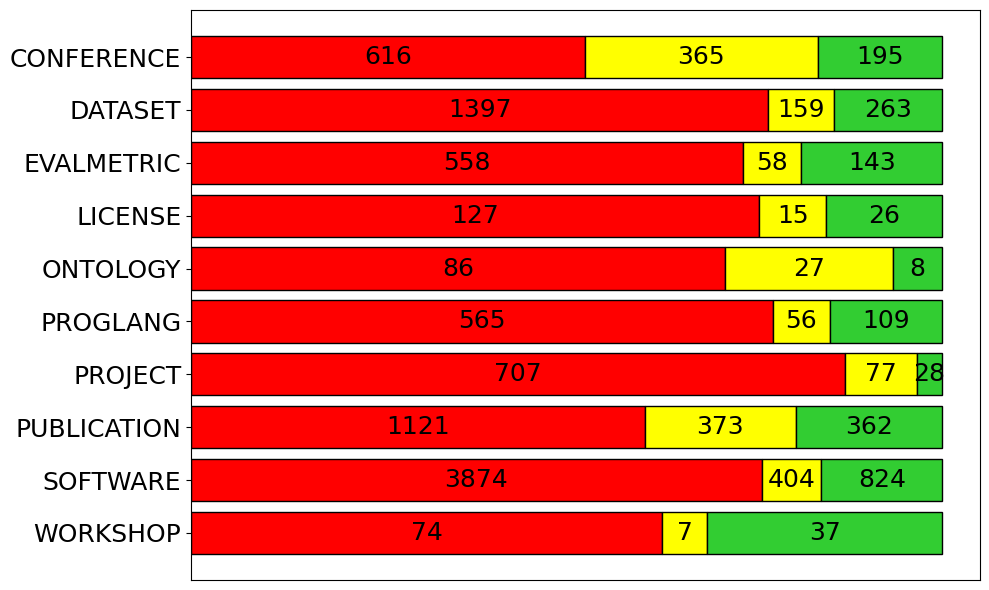

In [34]:
import matplotlib.pyplot as plt

# Data
classes = [
    "CONFERENCE", "DATASET", "EVALMETRIC", "LICENSE", "ONTOLOGY",
    "PROGLANG", "PROJECT", "PUBLICATION", "SOFTWARE", "WORKSHOP"
]

raw_values = [
    [616, 365, 195],
    [1397, 159, 263],
    [558, 58, 143],
    [127, 15, 26],
    [86, 27, 8],
    [565, 56, 109],
    [707, 77, 28],
    [1121, 373, 362],
    [3874, 404, 824],
    [74, 7, 37]
]

# Normalize values row-wise
values = [[v / sum(row) for v in row] for row in raw_values]

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = range(len(classes))

# Bar colors
colors = ['red', 'yellow', 'limegreen']

# Draw stacked horizontal bars
for i, (train, val, test) in enumerate(values):
    ax.barh(i, train, color=colors[0], edgecolor='black')
    ax.barh(i, val, left=train, color=colors[1], edgecolor='black')
    ax.barh(i, test, left=train + val, color=colors[2], edgecolor='black')

# Add text labels as percentages
for i, (train, val, test) in enumerate(values):
    ax.text(train / 2, i, f"{raw_values[i][0]}", va='center', ha='center', fontsize=18, color='black')
    ax.text(train + val / 2, i, f"{raw_values[i][1]}", va='center', ha='center', fontsize=18)
    ax.text(train + val + test / 2, i, f"{raw_values[i][2]}", va='center', ha='center', fontsize=18, color='black')

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(classes, fontsize=18)
ax.invert_yaxis()
ax.xaxis.set_visible(False)

# ax.set_xlim(0, 1)
# ax.set_xlabel('Spans', fontsize=18)
# ax.set_title('Text Span Distribution (Train / Val / Test)', fontsize=16)
ax.tick_params(axis='x', labelsize=18)
# Legend
# patches = [plt.Rectangle((0, 0), 1, 1, color=c) for c in colors]
# ax.legend(patches, ['Train', 'Val', 'Test'], loc='lower right', fontsize=14)

plt.tight_layout()
plt.savefig('span_distribution.png', dpi=300)


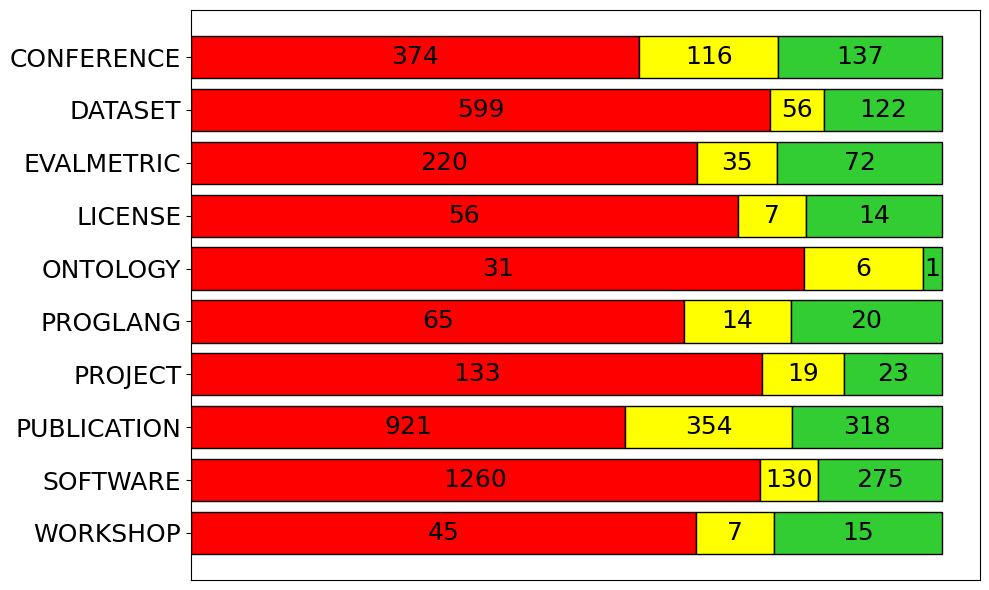

In [35]:
import matplotlib.pyplot as plt

# Data
classes = [
    "CONFERENCE", "DATASET", "EVALMETRIC", "LICENSE", "ONTOLOGY",
    "PROGLANG", "PROJECT", "PUBLICATION", "SOFTWARE", "WORKSHOP"
]
raw_values = [
    [374, 116, 137],  # CONFERENCE
    [599, 56, 122],   # DATASET
    [220, 35, 72],    # EVALMETRIC
    [56, 7, 14],      # LICENSE
    [31, 6, 1],       # ONTOLOGY
    [65, 14, 20],     # PROLANG
    [133, 19, 23],    # PROJECT
    [921, 354, 318],  # PUBLICATION
    [1260, 130, 275], # SOFTWARE
    [45, 7, 15]       # WORKSHOP
]

# Normalize values row-wise
values = [[v / sum(row) for v in row] for row in raw_values]

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = range(len(classes))

# Bar colors
colors = ['red', 'yellow', 'limegreen']

# Draw stacked horizontal bars
for i, (train, val, test) in enumerate(values):
    ax.barh(i, train, color=colors[0], edgecolor='black')
    ax.barh(i, val, left=train, color=colors[1], edgecolor='black')
    ax.barh(i, test, left=train + val, color=colors[2], edgecolor='black')

# Add text labels as percentages
for i, (train, val, test) in enumerate(values):
    ax.text(train / 2, i, f"{raw_values[i][0]}", va='center', ha='center', fontsize=18, color='black')
    ax.text(train + val / 2, i, f"{raw_values[i][1]}", va='center', ha='center', fontsize=18)
    ax.text(train + val + test / 2, i, f"{raw_values[i][2]}", va='center', ha='center', fontsize=18, color='black')

# Formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(classes, fontsize=18)
ax.invert_yaxis()
# ax.set_xlim(0, 1)
# ax.set_xlabel('Spans', fontsize=18)
# ax.set_title('Text Span Distribution (Train / Val / Test)', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.xaxis.set_visible(False)

# Legend
# patches = [plt.Rectangle((0, 0), 1, 1, color=c) for c in colors]
# ax.legend(patches, ['Train', 'Val', 'Test'], loc='lower right', fontsize=14)

plt.tight_layout()
plt.savefig('unique_span_distribution.png', dpi=300)


In [33]:
train_files = [x for x in train_data_dir.rglob("*.tsv")]
val_files  = [x for x in val_data_dir.rglob("*.tsv")]
test_files = [x for x in test_data_dir.rglob("*.tsv")]
print(f'{len(train_files)} train files found.')
print(f'{len(val_files)} val files found.')
print(f'{len(test_files)} test files found.')
print(f'total {len(train_files) + len(val_files) + len(test_files)} files found.')

183 train files found.
33 val files found.
40 test files found.
total 256 files found.
